### Poisson distribution of a population

In [9]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import poisson

In [10]:
np.random.seed(1234)

In [11]:
long_breaks = stats.poisson.rvs(loc=10, mu=60, size=3000)
#3000 people taking about 60 break
#long break var represents 3000 answers to question: how many mins on an average do you take breaks for?

<AxesSubplot:>

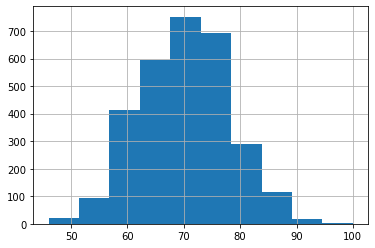

In [12]:
pd.Series(long_breaks).hist()

In [13]:
short_breaks = stats.poisson.rvs(loc =10, mu=15, size = 6000)
#short_breaks var represents 6000 answers saying they take break in 15mins

<AxesSubplot:>

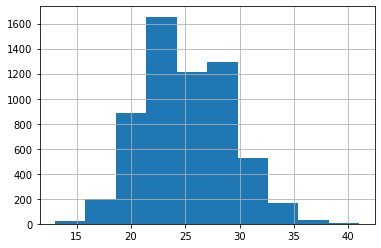

In [14]:
pd.Series(short_breaks).hist()

In [15]:
breaks = np.concatenate((long_breaks, short_breaks))

<AxesSubplot:>

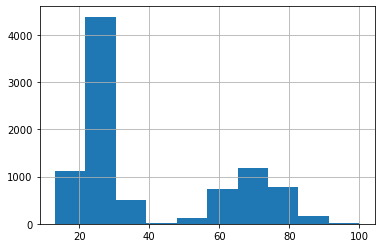

In [16]:
pd.Series(breaks).hist()

In [17]:
#breaks is a random variable of a population of 9000 people
#39.999 is the population parameter
breaks.mean()

39.99944444444444

In [19]:
sample_breaks = np.random.choice (a = breaks, size = 100)
#taking a sample of 100

In [20]:
breaks.mean() - sample_breaks.mean()
#check if the sample statistics could be a good estimate of a population parameter

-1.140555555555558

Employee population

In [22]:
employee_races = (["white"]*2000) + (["black"]*1000) + (["hispanic"]*1000) + (["asian"]*3000) + (["other"]*3000)

In [21]:
import random

In [23]:
demo_sample = random.sample (employee_races, 1000)

In [26]:
type(demo_sample)

list

In [83]:
for race in set(demo_sample):
    print (race + " proportion estimate: ")
    print (demo_sample.count(race)/1000.)

white proportion estimate: 
0.188
black proportion estimate: 
0.109
asian proportion estimate: 
0.318
other proportion estimate: 
0.284
hispanic proportion estimate: 
0.101


trong sample 1000 value, co 10.1% la hispanic

### Sampling distributions

In [31]:
point_estimates = [] #list of sample means from sampling distributions

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

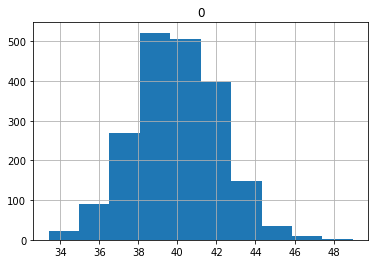

In [86]:
for x in range(500):
    sample = np.random.choice(a=breaks, size =100)
    point_estimates.append(sample.mean())
pd.DataFrame(point_estimates).hist()
#this is to see the final result of central limit theorem

In [87]:
breaks.mean() - np.array(point_estimates).mean()

0.022989444444441176

### Computing confidence intervals to estimate population parameters

In [36]:
import math

In [37]:
sample_size = 100

In [38]:
sample = np.random.choice (a =breaks, size = sample_size)

In [41]:
sample_mean = sample.mean()

In [42]:
sample_stdev = sample.std()

In [43]:
sigma = sample_stdev/math.sqrt(sample_size) #population stdev estimate

In [44]:
stats.t.interval(alpha = 0.95, df = sample_size-1, loc = sample_mean, scale = sigma)

(36.75133372476455, 45.52866627523545)

The CI includes population mean of 39.999 

#### Take 10000 CIs to see how population mean fall: CI implies the frequency (percent chance) that the interval contains population mean 

In [46]:
#ham tinh toan CI
def makeConfidenceInterval():
    sample_size = 100
    sample = np.random.choice (a = breaks, size = sample_size)
    sample_mean = sample.mean() #point estimate
    sample_stdev = sample.std()
    sigma = sample_stdev/math.sqrt(sample_size)
    return stats.t.interval (alpha = 0.95, df = sample_size -1, loc = sample_mean, scale = sigma)

#### Test the probability that a single CI will contain the true population mean of 39.999

In [51]:
times_in_interval = 0.
for i in range(10000):
    interval = makeConfidenceInterval()
    if 39.999 >= interval[0] and 39.999 <= interval [1]:
        times_in_interval += 1 #neu thoa man dieu kien tren thi 39.999 falls vao CI, tinh la 1 lan
print (times_in_interval/10000) #so lan/10000 mau = probability can tinh

0.952


Luu y ve code: Ket qua tra ra probability cua tung lan 1, ma khong add up thanh 1 lan => phai de print ket qua o ngoai vong for. 

Nhan xet: 95% of CIs contained actual population mean

In [47]:
times_in_interval = 0.

#### What if we change the confidence level = 1 - significance level?

In [81]:
for confidence_level in (0.5, 0.8, 0.85, 0.9, 0.95, 0.99): 
    confidence_interval = stats.t.interval (alpha = confidence, df = sample_size -1, loc = sample_mean, scale = sigma)
    size_of_interval = round(confidence_interval[1]-confidence_interval[0], 2)
    print ("confidence level {0} has an interval size of {1}".format (confidence_level, size_of_interval))

confidence level 0.5 has an interval size of 11.62
confidence level 0.8 has an interval size of 11.62
confidence level 0.85 has an interval size of 11.62
confidence level 0.9 has an interval size of 11.62
confidence level 0.95 has an interval size of 11.62
confidence level 0.99 has an interval size of 11.62


Nhan xet: confidence interval tang khi tang confidence level

### Hypothesis testing: t-test of sample mean's significance

#### Cau hoi: Does the engineering department take breaks of the same duration as the company as a whole?

Ho: the engineering department takes longer break

Ha: the engineering department takes shorter break

In [59]:
long_breaks_in_engineering = stats.poisson.rvs(loc = 10, mu = 55, size = 100)
short_breaks_in_engineering = stats.poisson.rvs(loc=10, mu=15, size =300)
engineering_breaks = np.concatenate((long_breaks_in_engineering, short_breaks_in_engineering))
print(engineering_breaks.mean())
print(breaks.mean())

34.8825
39.99944444444444


In [60]:
pop_mean = breaks.mean()

In [65]:
t_statistic, p_value = stats.ttest_1samp(a=engineering_breaks, popmean=pop_mean)

In [66]:
print (t_statistic)

-5.7427401794634845


In [67]:
print (p_value) 

1.8485738627160373e-08


meaning: we should expect xx% of chance to see this value appear. Hence, if the p-value is very small, chance of seeing the null hypothesis appear is low. We can reject the null hypothesis

### Hypothesis testing: 
1. Chi-square test for goodness of fit: Does the dist. of observed value fit an expected distribution? 

Ho: The observed dist. fits the expected one

2. Chi-square test for association/independence between 2 categorical var: is there any difference between people interacting with web A and web B in an A/B testing?

Ho: There is no association between var

In [73]:
observed = [102, 178, 186, 34]
expected = [156, 165.5, 147, 31.5]
chi_squared, p_value = stats.chisquare(f_obs = observed, f_exp=expected)
chi_squared, p_value

(30.1817679275599, 1.26374310311106e-06)

In [78]:
observed = np.array([[134, 54], [110, 48]])
chi_squared, p_value, degrees_of_freedom, matrix = stats.chi2_contingency (observed = observed)

In [79]:
chi_squared, p_value

(0.04762692369491045, 0.8272452870442226)

p_value is relatively large. Fail to reject Ho